### **Project Name: USA Regional Sales Analysis**

#### **🗂️ Project Summary**
This EDA notebook provides a comprehensive analysis of Acme Co.’s USA sales data from 2014–2018, focusing on the following areas:

Data Profiling & Cleaning: Verified the dataset schema, addressed missing budgets, and corrected data types to ensure data integrity.

Univariate & Bivariate Analysis: Explored distributions of revenue, profit margin, and unit price, while analyzing breakdowns by product, channel, and region, as well as customer segments.

Trend & Seasonality: Visualized monthly and yearly sales patterns to identify recurring surges and dips over time.

Outlier Detection: Detected extreme transactions at both ends of the revenue and unit-price spectrum to understand anomalies.

Correlation & Segmentation: Examined relationships among key metrics and clustered customers based on revenue versus profit margin to uncover high-value segments.

### **Problem Statement**

ABC Company's 2014-2018 sales data to identify key revenue and profit drivers across products, channels and regions, uncover seasonal trends and outliers and align performance against budgets. Use these insights to optimize pricing, promotions and market expansiosn of sustainable growth and reduced concentration risk.


### **Objective**
ABC Company's 2014–2018 sales data to generate actionable insights by:

Identifying top-performing products, channels, and regions that drive revenue and profitability

Revealing seasonal trends and anomalies to optimize planning and operations

Detecting pricing and margin risks from outlier transactions

Guiding data-driven decisions on pricing, promotions, and market expansion

These insights will serve as the foundation for a Power BI dashboard to support strategic decision-making and sustainable growth.

## **Set-up and Configuration**

In [ ]:
## Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure notebook display
%matplotlib inline
sns.set_style("whitegrid")    # clean seaborn style
plt.rcParams['figure.figsize'] = (10, 6)   # default fig size

In [ ]:
## Reading the data
sheets = pd.read_excel('/content/Regional Sales Dataset.xlsx', sheet_name = None)

In [ ]:
# Assign to named DataFrames
df_sales       = sheets['Sales Orders']
df_customers   = sheets['Customers']
df_products    = sheets['Products']
df_regions     = sheets['Regions']
df_state_reg   = sheets['State Regions']
df_budgets     = sheets['2017 Budgets']

In [ ]:

# 🔍 2.1 QUICK SHAPE OVERVIEW
print(f"df_sales      shape: {df_sales.shape}      # Sales Orders")
print(f"df_customers  shape: {df_customers.shape}  # Customers")
print(f"df_products   shape: {df_products.shape}   # Products")
print(f"df_regions    shape: {df_regions.shape}    # Regions")
print(f"df_state_reg  shape: {df_state_reg.shape}  # State Regions")
print(f"df_budgets    shape: {df_budgets.shape}    # 2017 Budgets")

df_sales      shape: (64104, 12)      # Sales Orders
df_customers  shape: (175, 2)  # Customers
df_products   shape: (30, 2)   # Products
df_regions    shape: (994, 15)    # Regions
df_state_reg  shape: (49, 3)  # State Regions
df_budgets    shape: (30, 2)    # 2017 Budgets


In [ ]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
df_customers.head(5)

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [ ]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [ ]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [ ]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [ ]:
df_budgets.head(5)

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [ ]:

# The first row of df_state_reg contains the real column names.
new_header        = df_state_reg.iloc[0]      # grab the first row
df_state_reg.columns = new_header             # set columns
df_state_reg       = df_state_reg[1:].reset_index(drop=True)  # drop header row and reset
df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [ ]:
##Check null counts
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [ ]:
##checking duplicate values
len(df_sales) == len(df_sales.drop_duplicates())

True

### **Data Cleaning and Wrangling**

In [ ]:
## Merging of datasets to create one master df

# 4.1 Merge with Customers
df = df_sales.merge(
    df_customers,
    how='left',
    left_on='Customer Name Index',
    right_on='Customer Index'
)

# 4.2 Merge with Products
df = df.merge(
    df_products,
    how='left',
    left_on='Product Description Index',
    right_on='Index'
)

# 4.3 Merge with Regions
df = df.merge(
    df_regions,
    how='left',
    left_on='Delivery Region Index',
    right_on='id'
)


# 4.4 Merge with State Regions
df = df.merge(
    df_state_reg[["State Code","Region"]],
    how='left',
    left_on='state_code',
    right_on='State Code'
)

# 4.5 Merge with Budgets
df = df.merge(
    df_budgets,
    how='left',
    on='Product Name'
)

# 4.6 Clean up redundant columns
cols_to_drop = [
    'Customer Index', 'Index', 'id', 'State Code',
    # add any auto-generated cols you don't need
]
df = df.drop(columns=cols_to_drop, errors='ignore')

df.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2017 Budgets
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [ ]:
## Converting columns names to lowercase for consistensy
df.columns = df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'currency code', 'warehouse code', 'delivery region index',
       'product description index', 'order quantity', 'unit price',
       'line total', 'total unit cost', 'customer names', 'product name',
       'name', 'county', 'state_code', 'state', 'type', 'latitude',
       'longitude', 'area_code', 'population', 'households',
       'median_income', 'land_area', 'water_area', 'time_zone', 'region',
       '2017 budgets'], dtype=object)

In [ ]:

# 4.x — DROP UNNECESSARY COLUMNS & RENAME FOR CLARITY (with Region)
# ------------------------------------------------------------------

# 1) List only the columns you want to KEEP, now including the broader 'region'
cols_to_keep = [
    'ordernumber',        # unique order ID
    'orderdate',          # date when the order was placed
    'customer names',     # customer who placed the order
    'channel',            # sales channel (e.g., Wholesale, Distributor)
    'product name',       # product purchased
    'order quantity',     # number of units ordered
    'unit price',         # price per unit
    'line total',         # revenue for this line item (qty × unit_price)
    'total unit cost',    # company’s cost for this line item
    'state_code',         # two-letter state code
    'state',              # full state name
    'region',             # broader U.S. region (e.g., South, West)
    'latitude',           # latitude of delivery city
    'longitude',          # longitude of delivery city
    '2017 budgets'        # budget target for this product in 2017
]

# Subset the DataFrame to only these columns
df = df[cols_to_keep]

# 2) Rename to more Pythonic / self-explanatory names, including region
df = df.rename(columns={
    'ordernumber'      : 'order_number',   # snake_case for consistency
    'orderdate'        : 'order_date',     # date of the order
    'customer names'   : 'customer_name',  # customer who placed it
    'product name'     : 'product_name',   # product sold
    'order quantity'   : 'quantity',       # units sold
    'unit price'       : 'unit_price',     # price per unit in USD
    'line total'       : 'revenue',        # revenue for the line item
    'total unit cost'  : 'cost',           # cost for the line item
    'state_code'       : 'state',          # two-letter state code
    'state'            : 'state_name',     # full state name
    'region'           : 'us_region',      # broader U.S. region
    'latitude'         : 'lat',            # latitude (float)
    'longitude'        : 'lon',            # longitude (float)
    '2017 budgets'     : 'budget'          # 2017 budget target (float)
})

# Display the cleaned DataFrame structure
df.shape

(64104, 15)

In [ ]:
df_2017 = df.loc[df['order_date'].dt.year == 2017]
df_2017

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget
46363,SO - 0002544,2017-01-01,NCS Group,Wholesale,Product 30,6,1239.5,7437.0,1028.785,NJ,New Jersey,Northeast,40.77955,-74.02375,1011609.684
46364,SO - 0006431,2017-01-01,Epic Group,Wholesale,Product 13,5,1829.1,9145.5,1207.206,CO,Colorado,West,39.06387,-108.55065,3720639.645
46365,SO - 0007491,2017-01-01,State Ltd,Wholesale,Product 15,9,2412.0,21708.0,1664.280,CA,California,West,33.96168,-118.35313,3299478.315
46366,SO - 0008741,2017-01-01,Fivebridge Ltd,Wholesale,Product 8,8,904.5,7236.0,750.735,IA,Iowa,Midwest,42.50056,-90.66457,1085037.329
46367,SO - 0009295,2017-01-01,Tagfeed Ltd,Wholesale,Product 2,12,1112.2,13346.4,811.906,FL,Florida,South,28.47689,-82.52546,3050087.565
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61621,SO - 0003524,2017-12-31,Zooveo Company,Wholesale,Product 1,9,984.9,8864.1,512.148,MO,Missouri,Midwest,39.08547,-94.35210,3016489.209
61622,SO - 0004785,2017-12-31,Wordware Company,Wholesale,Product 3,12,201.0,2412.0,90.450,PA,Pennsylvania,Northeast,39.95234,-75.16379,2642352.432
61623,SO - 0004950,2017-12-31,Dynazzy Company,Distributor,Product 6,9,3825.7,34431.3,3098.817,FL,Florida,South,29.13832,-80.99561,1672229.416
61624,SO - 0006829,2017-12-31,Pixoboo Corp,Distributor,Product 6,5,1835.8,9179.0,972.974,CT,Connecticut,Northeast,41.22509,-73.06111,1672229.416


In [ ]:
# Blank out budgets for non-2017 orders
df.loc[df['order_date'].dt.year != 2017, 'budget'] = pd.NA

# Inspect
df[['order_date','product_name','revenue','budget']].head(10)

,order_date,product_name,revenue,budget
0,2014-01-01,Product 27,14994.6,NaN
1,2014-01-01,Product 20,25868.7,NaN
2,2014-01-01,Product 26,5869.2,NaN
3,2014-01-01,Product 7,16368.1,NaN
4,2014-01-01,Product 8,18331.2,NaN
5,2014-01-01,Product 23,57412.3,NaN
6,2014-01-01,Product 1,20120.1,NaN
7,2014-01-01,Product 25,10452.0,NaN
8,2014-01-01,Product 13,19262.5,NaN
9,2014-01-01,Product 14,34974.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_number   64104 non-null  object        
 1   order_date     64104 non-null  datetime64[ns]
 2   customer_name  64104 non-null  object        
 3   channel        64104 non-null  object        
 4   product_name   64104 non-null  object        
 5   quantity       64104 non-null  int64         
 6   unit_price     64104 non-null  float64       
 7   revenue        64104 non-null  float64       
 8   cost           64104 non-null  float64       
 9   state          64104 non-null  object        
 10  state_name     64104 non-null  object        
 11  us_region      64104 non-null  object        
 12  lat            64104 non-null  float64       
 13  lon            64104 non-null  float64       
 14  budget         15263 non-null  float64       
dtypes: datetime64[ns](1

In [ ]:
# Check for missing values in each column of the dataset
df.isnull().sum()

,0
order_number,0
order_date,0
customer_name,0
channel,0
product_name,0
quantity,0
unit_price,0
revenue,0
cost,0
state,0


### **Feature Engineering**

In [ ]:
#1. Calcuate tota_cost for each line item
df['total_cost'] = df['quantity']*df['cost']

#2. Calculate Profit = total_cost - revenue
df['profit'] = df['revenue']-df['total_cost']

# 3. Calculate profit margin as a percentage
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# 4. Extract full month name from order_date for labeling (e.g., 'January', 'February')
df['order_month_name'] = df['order_date'].dt.month_name()

# 5. Extract month number from order_date for correct sorting (1–12)
df['order_month_num'] = df['order_date'].dt.month

# 6. (Optional) Display the updated DataFrame
df

,order_number,order_date,customer_name,channel,product_name,quantity,unit_price,revenue,cost,state,state_name,us_region,lat,lon,budget,total_cost,profit,profit_margin_pct,order_month_name,order_month_num
0,SO - 000225,2014-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0,January,1
1,SO - 0003378,2014-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0,January,1
2,SO - 0005126,2014-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,California,West,37.66243,-121.87468,NaN,4108.440,1760.760,30.0,January,1
3,SO - 0005614,2014-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Indiana,Midwest,39.16533,-86.52639,NaN,7201.964,9166.136,56.0,January,1
4,SO - 0005781,2014-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Connecticut,Northeast,41.77524,-72.52443,NaN,10082.160,8249.040,45.0,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64099,SO - 0007573,2018-02-28,Dazzlesphe Corp,Wholesale,Product 26,12,1815.7,21788.4,980.478,PA,Pennsylvania,Northeast,40.15511,-74.82877,NaN,11765.736,10022.664,46.0,February,2
64100,SO - 0007706,2018-02-28,Yombu Corp,Export,Product 21,6,864.3,5185.8,579.081,IL,Illinois,Midwest,42.11030,-88.03424,NaN,3474.486,1711.314,33.0,February,2
64101,SO - 0007718,2018-02-28,Bath Group,Distributor,Product 13,11,3953.0,43483.0,2648.510,FL,Florida,South,26.24453,-80.20644,NaN,29133.610,14349.390,33.0,February,2
64102,SO - 0008084,2018-02-28,Linklinks Ltd,Distributor,Product 20,7,3959.7,27717.9,2930.178,NY,New York,Northeast,42.91002,-78.74182,NaN,20511.246,7206.654,26.0,February,2


#📊 **Exploratory Analysis**

### Goal: Track revenue trends over time to detect seasonality or sales spikes

Chart: Line chart

EDA Type: Temporal (time series)

Structure: Line with markers to highlight monthly revenue points clearly

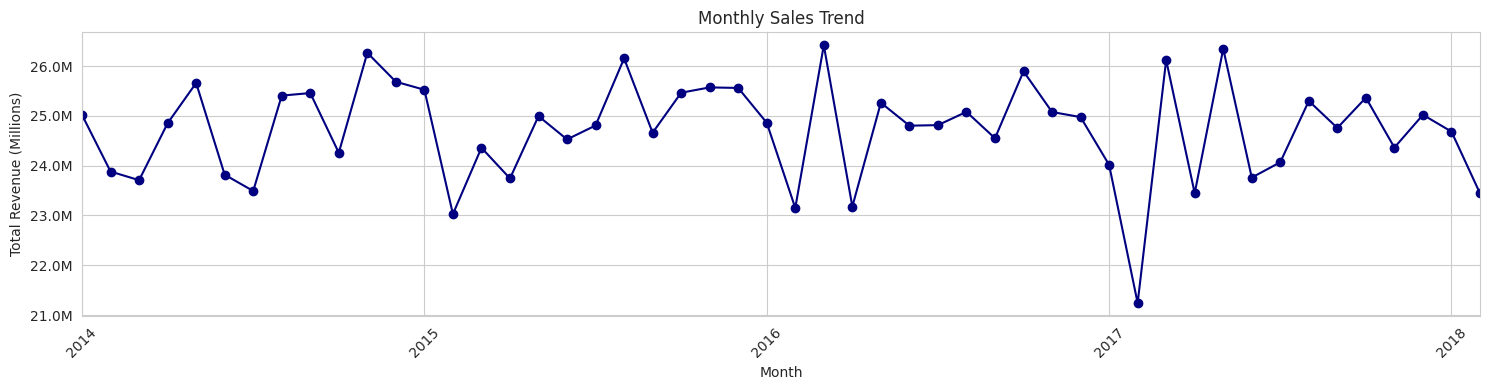

In [ ]:
# Convert order_date to monthly period (e.g., 2022-01, 2022-02)
df['order_month'] = df['order_date'].dt.to_period('M')

# Calculate total revenue for each month
monthly_sales = df.groupby('order_month')['revenue'].sum()

# Set figure size for clarity
plt.figure(figsize=(15,4))

# Plot the monthly sales trend with circle markers and navy line
monthly_sales.plot(marker='o', color='navy')

# Scale y-axis values to millions for readability
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

# Add title and axis labels
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (Millions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()


### **Insights**

**Overall Trend:** Monthly revenue from 2014–2018 remained mostly between 23M–26M, indicating a stable and consistent business performance over multiple years.

**Year-wise Performance:** While 2014–2016 showed steady growth, 2017 experienced minor declines in certain months, such as February 2017 (21.2M), suggesting potential seasonal or operational impacts.

**Seasonality Patterns:** Revenue peaks consistently occurred in Q4 (October–December) across all years, likely driven by holiday season demand and end-of-year promotions, while February tended to show lower sales.

**Outliers / Dips:** February 2017 represented a significant low revenue outlier, while March 2016 showed unusually high revenue, highlighting the impact of exceptional events such as product launches, campaigns, or market fluctuations.

**Consistency & Variability:** The relatively low month-to-month variation indicates high operational consistency and predictable revenue streams, which aids in forecasting and strategic planning.

**Revenue Optimization Opportunities:** Targeting marketing and sales initiatives during low-revenue months (Feb–Apr) and capitalizing on peak Q4 months can smooth revenue fluctuations, enhance seasonal performance, and optimize overall sales strategy.

## **2. Top 10 Products by Revenue (In Millions)**

Goal: Identify the highest-grossing products to focus marketing and inventory efforts

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with revenue scaled in millions

/tmp/ipython-input-2797465080.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


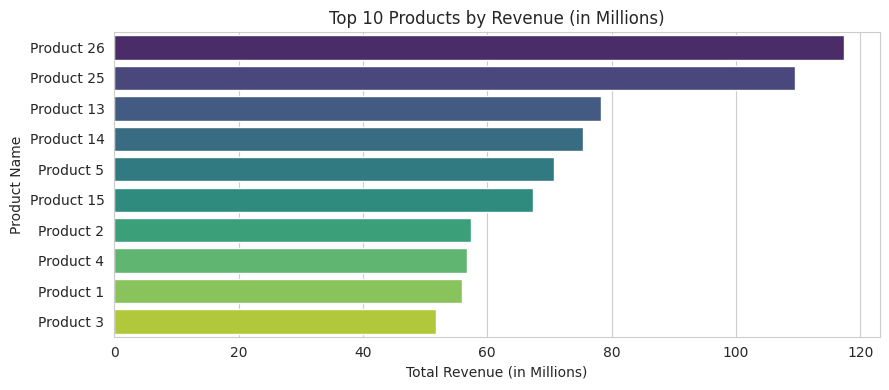

In [ ]:
# Calculate total revenue for each product and convert values to millions
product_revenue = df.groupby('product_name')['revenue'].sum() / 1_000_000

# Select the top 10 products by revenue
top_10_products = product_revenue.nlargest(10)

# Set the figure size for clarity
plt.figure(figsize=(9, 4))

# Plot a horizontal bar chart: x-axis as revenue in millions, y-axis as product names
sns.barplot(
    x = top_10_products.values,
    y = top_10_products.index,
    palette='viridis'     # Color palette for bars
)

# Add title and axis labels
plt.title('Top 10 Products by Revenue (in Millions)')  # Main title
plt.xlabel('Total Revenue (in Millions)')              # X-axis label
plt.ylabel('Product Name')                             # Y-axis label


# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()

## **INSIGHTS**

Revenue is heavily concentrated among the top two products — **Product 26** and **Product 25**, which together contribute over 35–40% of total sales. Mid-tier products show stable but moderate performance, while lower-tier ones lag significantly, indicating a need to **diversify and boost underperforming products** to reduce dependency on top performers.


## **3. Top 10 Products by Avg Profit Margin**

Goal: Compare average profitability across products to identify high-margin items

Chart: Horizontal bar chart

EDA Type: Univariate

Structure: Bars sorted descending to show top 10 products with average profit margin values

/tmp/ipython-input-828494666.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


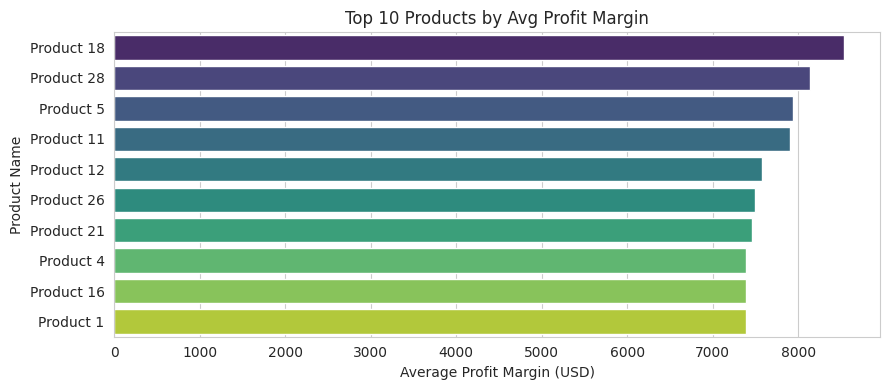

In [ ]:
# Compute average profit per product and find out the top 10
top_margin = (
    df.groupby('product_name')['profit']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Set the figure size for clarity
plt.figure(figsize=(9, 4))

# Plot a horizontal bar chart: x-axis as revenue in millions, y-axis as product names
sns.barplot(
    x = top_margin.values,
    y = top_margin.index,
    palette='viridis'     # Color palette for bars
)

# Add title and axis labels
plt.title('Top 10 Products by Avg Profit Margin')  # Main title
plt.xlabel('Average Profit Margin (USD)')              # X-axis label
plt.ylabel('Product Name')                             # Y-axis label


# Adjust layout to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()


### **INSIGHTS**

Profit is fairly well distributed among the top products, with **Product 18** leading at **₹8.53K**, followed closely by **Products 28, 5, and 11**, each contributing around **₹7.9–8.1K**. The narrow margin between the top 10 products indicates **consistent profitability across multiple offerings**, reflecting a **balanced product portfolio** rather than overreliance on a single high-profit item.


## **4. Sales by Channel (Pie Chart)**

Goal: Show distribution of total sales across channels to identify dominant sales routes

Chart: Pie chart

EDA Type: Univariate

Structure: Pie segments with percentage labels, colors for clarity, start angle adjusted

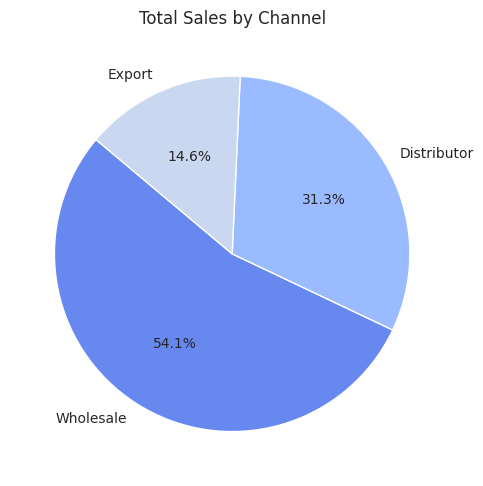

In [ ]:
# Group revenue by sales channel and sort descending
channel_sales = (
    df.groupby('channel')['revenue']
    .sum()
    .sort_values(ascending = False )
)

#set the figure for pie chart
plt.figure(figsize=(5, 5))

# Plot pie chart with percentage of lables and a defined start angle
plt.pie(
    channel_sales.values,                   # Data: revenue values per channel
    labels=channel_sales.index,             # Labels: channel names
    autopct='%1.1f%%',                   # Display percentages with one decimal
    startangle=140,                      # Rotate chart so first slice starts at 140 degrees
    colors=sns.color_palette('coolwarm') # Color palette for slices
)

# Add title for context
plt.title('Total Sales by Channel')

# Adjust layout to ensure everything fits well
plt.tight_layout()

# Display the chart
plt.show()




### **INSIGHTS**

Wholesale dominates with ~53% of total revenue, making it the primary
sales driver and a critical channel for business performance.

Distributor sales contribute about 31%, representing a strong secondary channel that offers stability and reach in local markets.

Exports account for only 14%, indicating untapped international potential — an area where targeted expansion or partnerships could boost global presence.

## **5. Average Order Value (AOV) Distribution**
Goal: Understand distribution of order values to identify typical spending levels and outliers

Chart: Histogram

EDA Type: Univariate

Structure: Histogram with 50 bins, colored bars with edge highlights to show frequency of order values

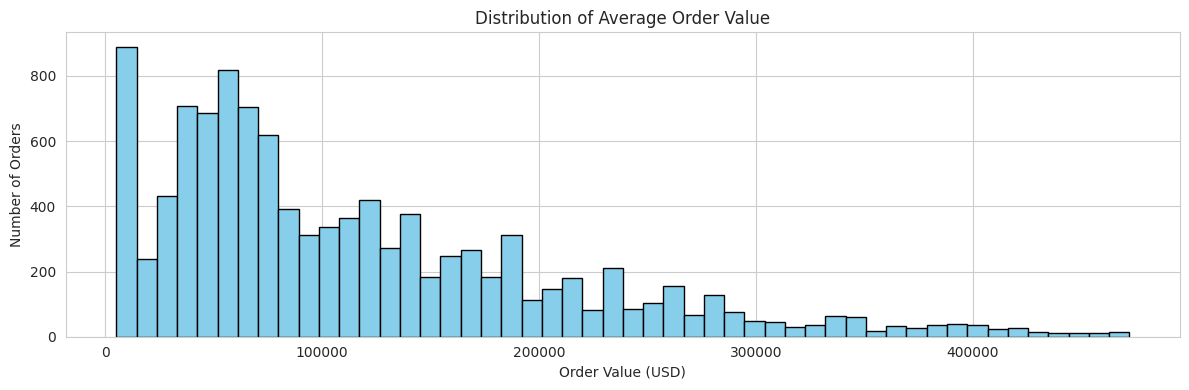

In [ ]:
# Calculate the total revenue for each order to get the order value
aov = df.groupby('order_number')['revenue'].sum()

# Set the figure size for better visibility
plt.figure(figsize=(12, 4))

# Plot a histogram of order values
plt.hist(
    aov,               # Data: list of order values
    bins=50,           # Number of bins to group order values
    color='skyblue',   # Fill color of the bars
    edgecolor='black'  # Outline color of the bars
)

# Add title and axis labels for context
plt.title('Distribution of Average Order Value')
plt.xlabel('Order Value (USD)')
plt.ylabel('Number of Orders')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

### **INSIGHTS**

The order‐value distribution is heavily right‐skewed, with most orders clustering between
120 K and a pronounced mode around
50-60 K.

A long tail of high-value transactions extends up toward
500 K, but these large orders represent only a small share of total volume.

## **6. Profit Margin % vs. Unit Price**
Goal: Examine relationship between unit price and profit margin percentage across orders

Chart: Scatter plot

EDA Type: Bivariate

Structure: Scatter points with transparency to show data density

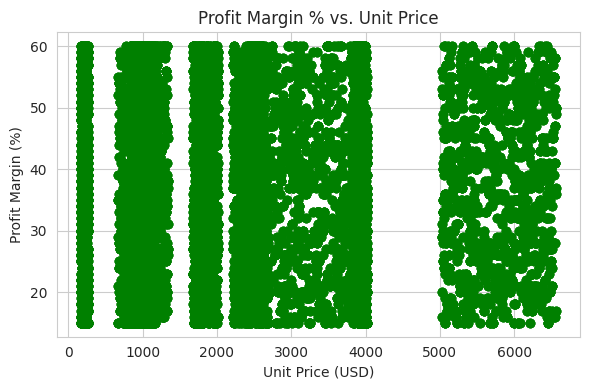

In [ ]:
# Calculate profit margin percentage for each record
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot unit price vs. profit margin percentage
plt.scatter(
    df['unit_price'],            # X-axis: unit price in USD
    df['profit_margin_pct'],     # Y-axis: profit margin percentage
    alpha=0.6,                   # Transparency level for overlapping points
    color='green'                # Point color
)

# Add title and axis labels
plt.title('Profit Margin % vs. Unit Price')  # Chart title
plt.xlabel('Unit Price (USD)')                # X-axis label
plt.ylabel('Profit Margin (%)')               # Y-axis label

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

### **INSIGHTS**

Most profit margins fall between 20–60%, indicating a capped margin, while unit prices form distinct bands, reflecting standardized product tiers. There’s no clear linear relationship between price and margin, as high-priced items don’t always yield higher profitability. The densest cluster is in the 3000–4000 USD range with varied margins, and sparse points at extremes may indicate outliers or special cases.


## **7. Total Sales by US Region**
Goal: Compare total sales across U.S. regions to identify top‑performing markets and areas for targeted growth.

Chart: Horizontal bar chart

EDA Type: Univariate comparison

Structure:

Bars sorted ascending (Northeast → West) for clear bottom‑to‑top ranking
X‑axis in millions USD, Y‑axis listing regions

/tmp/ipython-input-639306006.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


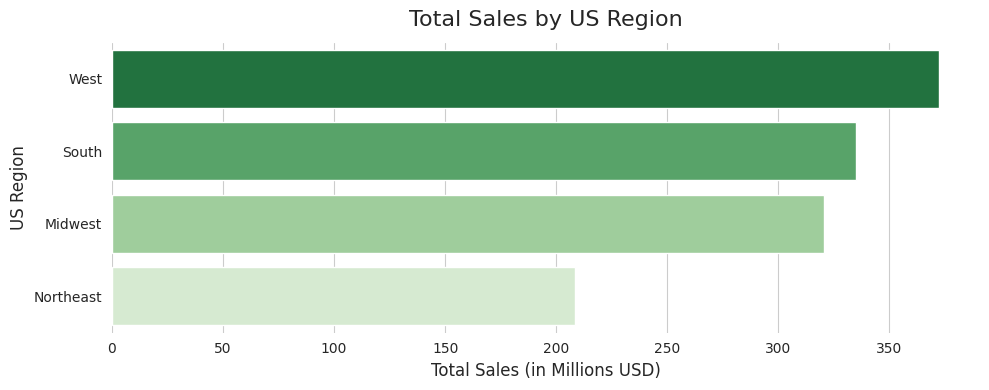

In [ ]:
# 1. Aggregate total sales by region (in millions)
region_sales = (
    df
    .groupby('us_region')['revenue']
    .sum()
    .sort_values(ascending=False)  # so bars go top→bottom
    / 1e6                         # convert to millions
)

# 2. Plot
plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'          # dark→light green
)

# 3. Formatting
plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


### **INSIGHTS**

* **West leads** with ~$360 M in sales (~35% of total), highlighting its market dominance.
* **South and Midwest** each contribute ~$320 M (~32%), showing strong, consistent demand.
* **Northeast lags** at ~$210 M (~20%), suggesting growth potential.
  **Action:** Target the Northeast with local promotions and strategic partnerships while sustaining success in other regions.


## **8. Total Sales by State (Choropleth Map)**
Goal: Visualize geographic distribution of sales to identify high- and low-performing states and uncover regional gaps.

Chart: US choropleth map

EDA Type: Univariate geospatial

Structure:

States shaded by total sales (in millions USD) using a blue gradient
Legend on the right showing sales scale (M USD)
Hover tooltips display exact sales for each state
Map scoped to USA for clear regional context

In [ ]:
import plotly.express as px

# 1. Aggregate revenue by state (in millions)
state_sales = (
    df
    .groupby('state')['revenue']
    .sum()
    .reset_index()
)
state_sales['revenue_m'] = state_sales['revenue'] / 1e6  # convert to millions

# 2. Plotly choropleth
fig = px.choropleth(
    state_sales,
    locations='state',            # column with state codes
    locationmode='USA-states',    # tells Plotly these are US states
    color='revenue_m',
    scope='usa',
    labels={'revenue_m':'Total Sales (M USD)'},
    color_continuous_scale='Blues',
    hover_data={'revenue_m':':.2f'}  # show 2 decimals
)

# 3. Layout tuning
fig.update_layout(
    title_text='Total Sales by State',
    margin=dict(l=0, r=0, t=40, b=0),
    coloraxis_colorbar=dict(
        title='Sales (M USD)',
        ticksuffix='M'
    )
)

fig.show()

### **INSIGTHS**

California leads with 228 M and Florida (90 M).
Mid‑tier states (e.g., Texas 84 M, Illinois 111 M) hold steady performance but trail the top state by 117–145 M.
Lower‑tier states (e.g., Delaware 1.25 M, Maine 1.57 M) reveal a gradual drop, indicating uneven market penetration.
Action: Double down on top states with tailored promotions, and launch targeted growth initiatives in under‑penetrated regions to close the gap.

## **9. Customer Segmentation: Revenue vs. Profit Margin**

Goal: Segment customers by total revenue and average profit margin, highlighting order volume

Chart: Bubble chart (scatter plot with variable point sizes)

EDA Type: Multivariate

Structure: Scatter points sized by number of orders, plotting revenue vs. margin

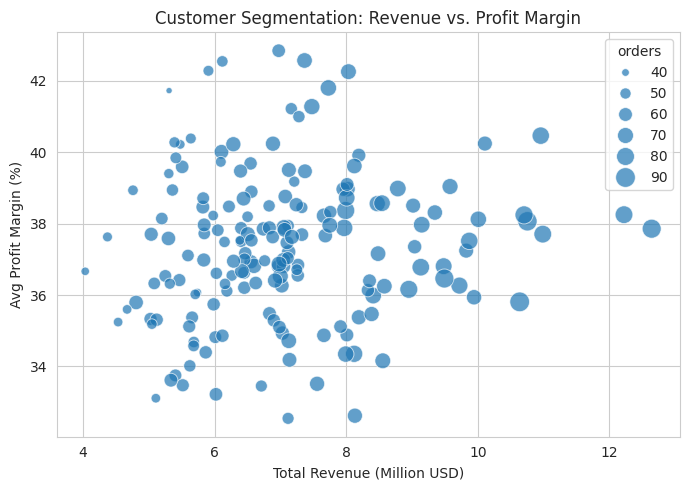

In [ ]:
# Aggregate metrics per customer
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_pct', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        # <-- use revenue in millions
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()


### **INSIGHTS**



* Customers with >$10 M in revenue tend to sustain margins between  36–40%, indicating that scale does not significantly erode profitability.

* Most customers cluster within the $6–10 M range and show stable margins (~34–40%), suggesting consistent pricing in this tier
Customers below $6 M display the widest margin variance (~33–43%), pointing to more volatile cost structures or discounts among smaller accounts.

* Bubble size (order count) increases with revenue, but margin levels appear unaffected—reinforcing revenue as the dominant performance driver over order volume

## **10. Correlation Heatmap of Numeric Features**
Goal: Identify relationships among key numeric variables to uncover potential multicollinearity

Chart: Correlation heatmap

EDA Type: Multivariate

Structure: Annotated heatmap with correlation coefficients for selected numeric columns

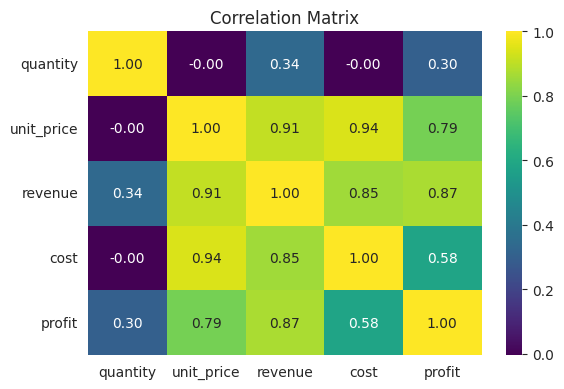

In [ ]:
# List numeric columns to include in the correlation calculation
num_cols = ['quantity', 'unit_price', 'revenue', 'cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis'  # Color palette for the heatmap
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

### **INSIGHTS**
1. Profit and revenue are very strongly correlated (0.87), indicating that as sales value increases, profit tends to rise as well.
2. Unit price is a key driver: it correlates 0.91 with revenue, 0.79 with profit, and 0.94 with cost—highlighting how pricing decisions ripple through both top‑line and expense figures.
3. Cost shows a strong link to revenue (0.85) but a more moderate tie to profit (0.58), underscoring that while higher sales often bring higher expenses, margins can still vary.
4. Quantity has virtually no correlation with unit price or cost (≈0.00) and only modest associations with revenue (0.34) and profit (0.30), making volume a secondary factor compared to pricing.

## **🔍 Key Insights Summary**

Revenue Trends:

Stable monthly revenue ($23M–$26M) from 2014–2018, peaking in Q4; Feb 2017 (~$21.2M) shows a notable dip.

Top Products & Profitability:

Revenue: Product 26 & 25 drive ~35–40% of sales; mid- and lower-tier products underperform.

Profit: Top 10 products show consistent margins (20–60%), with Product 18 leading (~₹8.5K).

Channel & Customer Insights:

Channels: Wholesale 53%, Distributor 31%, Exports 14% (growth opportunity).

Customers: High-revenue accounts (> $10M) maintain stable margins; smaller accounts show more variability.

Pricing & Volume:

Unit price strongly drives revenue and profit; quantity has minimal impact.

Profit margins are capped, with no clear link between price and profitability.

Regional Performance:

Top regions: West ($360M), South & Midwest (~$320M each); Northeast ($210M) underperforming.

Top states: California leads (~$228M), followed by Florida, Texas, Illinois; smaller states lag.

Actionable Opportunities:

Boost marketing during low-revenue months (Feb–Apr).

Diversify mid- and lower-tier products.

Expand export channels and under-penetrated regions.

Optimize pricing tiers and promotions to improve margins.